## Mega_Case_Study


**Data Set Information: This datase is from uci dataset. is about fraud detection**

**This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data**

## Import the libraries

In [1]:
!pip install MiniSom

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import and load the dataset

In [3]:
dataset = pd.read_csv("Credit_Card_Applications.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head(10)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,15660390,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,15663942,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


In [4]:
print(X)

[[1.5776156e+07 1.0000000e+00 2.2080000e+01 ... 2.0000000e+00
  1.0000000e+02 1.2130000e+03]
 [1.5739548e+07 0.0000000e+00 2.2670000e+01 ... 2.0000000e+00
  1.6000000e+02 1.0000000e+00]
 [1.5662854e+07 0.0000000e+00 2.9580000e+01 ... 2.0000000e+00
  2.8000000e+02 1.0000000e+00]
 ...
 [1.5675450e+07 0.0000000e+00 1.8830000e+01 ... 2.0000000e+00
  1.0000000e+02 1.0000000e+00]
 [1.5776494e+07 0.0000000e+00 2.7420000e+01 ... 2.0000000e+00
  1.2000000e+02 1.2000000e+01]
 [1.5592412e+07 1.0000000e+00 4.1000000e+01 ... 1.0000000e+00
  5.6000000e+02 1.0000000e+00]]


In [5]:
print(y)

[0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1
 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1
 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0
 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0
 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1
 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0
 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0
 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0
 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1
 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1
 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1
 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1
 0 0 0 1 1 1 1 1 0 1 1 0 

In [6]:
dataset.tail(10)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
680,15790689,1,21.17,0.000,2,8,4,0.500,0,0,0,1,1,0,1,0
681,15665181,1,35.25,16.500,1,8,4,4.000,1,0,0,0,2,80,1,0
682,15633608,0,22.92,11.585,2,13,4,0.040,1,0,0,0,2,80,1350,1
683,15805261,0,48.17,1.335,2,3,7,0.335,0,0,0,0,2,0,121,0
684,15740356,1,43.00,0.290,1,13,8,1.750,1,1,8,0,2,100,376,1
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1
689,15592412,1,41.00,0.040,2,10,4,0.040,0,1,1,0,1,560,1,1


In [7]:
dataset.sample(10)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
111,15681509,1,47.33,6.500,2,8,4,1.000,0,0,0,1,2,0,229,0
269,15587266,1,28.58,3.625,2,6,4,0.250,0,0,0,1,2,100,1,0
523,15729718,0,21.50,6.000,2,6,4,2.500,1,1,3,0,2,80,919,1
79,15682576,0,32.17,1.460,2,9,4,1.085,1,1,16,0,2,120,2080,1
592,15748691,1,36.08,2.540,2,1,1,0.000,0,0,0,0,2,0,1001,0
541,15735330,1,26.67,14.585,2,3,5,0.000,0,0,0,1,2,178,1,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
259,15747757,1,35.00,3.375,2,8,8,8.290,0,0,0,1,2,0,1,0
499,15659031,1,20.42,7.000,2,8,4,1.625,1,1,3,0,2,200,1392,1
181,15632789,0,33.75,0.750,2,4,5,1.000,1,1,3,1,2,212,1,0


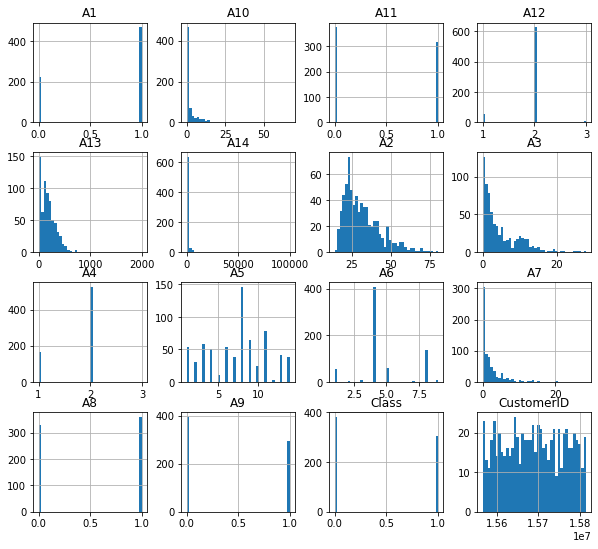

In [8]:
dataset.hist(figsize = (10,9), bins = 40);

### Basic insight into the daraset

In [9]:
dataset.shape

(690, 16)

In [10]:
dataset.dtypes

CustomerID      int64
A1              int64
A2            float64
A3            float64
A4              int64
A5              int64
A6              int64
A7            float64
A8              int64
A9              int64
A10             int64
A11             int64
A12             int64
A13             int64
A14             int64
Class           int64
dtype: object

In [11]:
dataset.columns.values

array(['CustomerID', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10', 'A11', 'A12', 'A13', 'A14', 'Class'], dtype=object)

In [12]:
dataset.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


### Handling Missing_data

In [14]:
missing_data = dataset.isnull()
missing_data

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
686,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
687,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
688,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Check missing data per column

In [15]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

CustomerID
False    690
Name: CustomerID, dtype: int64

A1
False    690
Name: A1, dtype: int64

A2
False    690
Name: A2, dtype: int64

A3
False    690
Name: A3, dtype: int64

A4
False    690
Name: A4, dtype: int64

A5
False    690
Name: A5, dtype: int64

A6
False    690
Name: A6, dtype: int64

A7
False    690
Name: A7, dtype: int64

A8
False    690
Name: A8, dtype: int64

A9
False    690
Name: A9, dtype: int64

A10
False    690
Name: A10, dtype: int64

A11
False    690
Name: A11, dtype: int64

A12
False    690
Name: A12, dtype: int64

A13
False    690
Name: A13, dtype: int64

A14
False    690
Name: A14, dtype: int64

Class
False    690
Name: Class, dtype: int64



### How many missing_data do we have

In [16]:
missing_data_count = dataset.isnull().sum()
missing_data_count

CustomerID    0
A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            0
A10           0
A11           0
A12           0
A13           0
A14           0
Class         0
dtype: int64

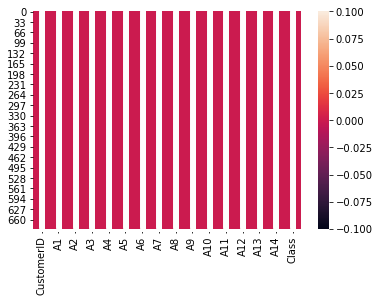

In [17]:
sns.heatmap(dataset.isnull(), annot = True)

### Descriptive Statistic

In [18]:
dataset.describe()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
count,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,1.569047e+07,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,7.150647e+04,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,1.556571e+07,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.563169e+07,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.569016e+07,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.575190e+07,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.581544e+07,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


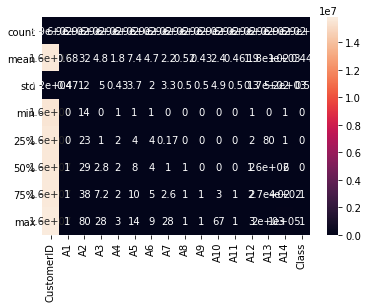

In [19]:
sns.heatmap(dataset.describe(), annot = True)

### Check the correlation

In [20]:
dataset.corr()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
CustomerID,1.000000,-0.017669,0.001531,0.048405,0.071517,-0.053314,-0.056552,0.055084,0.041009,0.019781,-0.006900,-0.002839,0.015464,-0.020295,0.040060,0.035400
A1,-0.017669,1.000000,0.036659,-0.028166,-0.063528,-0.005321,0.052658,0.097009,0.000918,-0.063256,-0.008427,0.053984,-0.059901,0.058595,0.003616,-0.013897
A2,0.001531,0.036659,1.000000,0.201315,0.089503,-0.093877,0.028510,0.392788,0.204342,0.083680,0.185574,0.054779,0.020703,-0.077159,0.018539,0.161626
A3,0.048405,-0.028166,0.201315,1.000000,0.091526,0.027665,0.094504,0.298902,0.244317,0.174846,0.271207,-0.013023,0.093752,-0.222346,0.123121,0.206294
A4,0.071517,-0.063528,0.089503,0.091526,1.000000,0.088846,0.046639,0.080624,0.129863,0.162464,0.106457,0.004964,0.006400,-0.001758,0.120065,0.194306
A5,-0.053314,-0.005321,-0.093877,0.027665,0.088846,1.000000,0.402284,0.144757,0.311833,0.222957,0.150166,0.024738,0.070222,0.088140,0.030735,0.373712
A6,-0.056552,0.052658,0.028510,0.094504,0.046639,0.402284,1.000000,0.240400,0.246193,0.080397,0.098841,0.093641,0.036435,0.070662,0.064841,0.246567
A7,0.055084,0.097009,0.392788,0.298902,0.080624,0.144757,0.240400,1.000000,0.345689,0.222982,0.322330,0.138139,-0.016297,-0.076389,0.051345,0.322475
A8,0.041009,0.000918,0.204342,0.244317,0.129863,0.311833,0.246193,0.345689,1.000000,0.432032,0.379532,0.091276,0.045054,-0.067387,0.090012,0.720407
A9,0.019781,-0.063256,0.083680,0.174846,0.162464,0.222957,0.080397,0.222982,0.432032,1.000000,0.571498,0.017043,0.176097,-0.053321,0.077652,0.458301


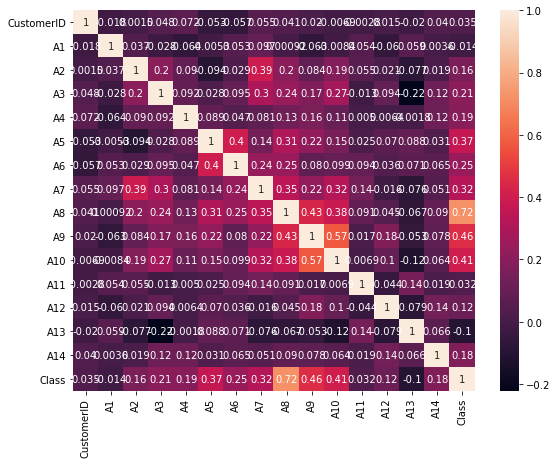

In [21]:
plt.figure(figsize = (9, 7))
sns.heatmap(dataset.corr(), annot = True)
plt.show()

### Feature Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range  = (0, 1))
X = sc.fit_transform(X)

In [23]:
print(X)

[[8.42681467e-01 1.00000000e+00 1.25263158e-01 ... 5.00000000e-01
  5.00000000e-02 1.21200000e-02]
 [6.96090562e-01 0.00000000e+00 1.34135338e-01 ... 5.00000000e-01
  8.00000000e-02 0.00000000e+00]
 [3.88981656e-01 0.00000000e+00 2.38045113e-01 ... 5.00000000e-01
  1.40000000e-01 0.00000000e+00]
 ...
 [4.39420332e-01 0.00000000e+00 7.63909774e-02 ... 5.00000000e-01
  5.00000000e-02 0.00000000e+00]
 [8.44034934e-01 0.00000000e+00 2.05563910e-01 ... 5.00000000e-01
  6.00000000e-02 1.10000000e-04]
 [1.06907888e-01 1.00000000e+00 4.09774436e-01 ... 0.00000000e+00
  2.80000000e-01 0.00000000e+00]]


### Training the SOM

In [24]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

### Let Visisualize the results

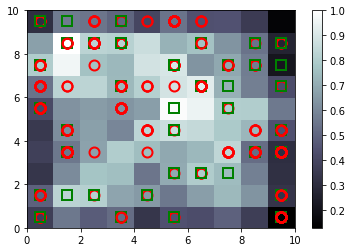

In [25]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

### Finding the Fraud

In [26]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,1)], mappings[(4,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

### Let print the Fraunch Clients

In [27]:
print("Fraud Customer IDs")
for i in frauds[:, 0]:
    print(int(i))

Fraud Customer IDs
15569682
15571121
15660390
15642391
15577515
15598802
15657778
15652658
15635244
15624595
15688264
15648876
15644878
15671987
15581700
15700511
15629133
15604963


### Part2 - From Unsupervised Learning to Supervised Learning

### Let Create Matrix of Features

In [28]:
customers = dataset.iloc[:, 1:].values

### Create a Depended Variable

In [29]:
a_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i, 0] in frauds:
    a_fraud[i] = 1

## Part3 - ANN

## Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

### Building ANN

In [31]:
import tensorflow as tf
tf.__version__

'2.3.1'

### Let initialize the ANN

In [32]:
ann = tf.keras.models.Sequential()

### Adding the input layers and first hidding layers

In [33]:
ann.add(tf.keras.layers.Dense(units = 2, activation = "relu"))

### Adding the OutPut layers

In [35]:
ann.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))

### Training the ANN

## Let Compile the ANN

In [36]:
ann.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

## Train the ANN on the Training set

In [37]:
ann.fit(customers, a_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 1s 911us/step - loss: 0.4702 - accuracy: 0.9739
Epoch 2/10
690/690 [==============================] - 1s 897us/step - loss: 0.2007 - accuracy: 0.9739
Epoch 3/10
690/690 [==============================] - 1s 836us/step - loss: 0.1332 - accuracy: 0.9739
Epoch 4/10
690/690 [==============================] - 1s 841us/step - loss: 0.1115 - accuracy: 0.9739
Epoch 5/10
690/690 [==============================] - 1s 880us/step - loss: 0.1051 - accuracy: 0.9739
Epoch 6/10
690/690 [==============================] - 1s 870us/step - loss: 0.1026 - accuracy: 0.9739
Epoch 7/10
690/690 [==============================] - 1s 865us/step - loss: 0.1013 - accuracy: 0.9739
Epoch 8/10
690/690 [==============================] - 1s 849us/step - loss: 0.1005 - accuracy: 0.9739
Epoch 9/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0997 - accuracy: 0.9739
Epoch 10/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0990 - 

## Let Predict the Test results

In [38]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

In [39]:
print(y_pred)

[[1.56514600e+07 3.75312106e-06]
 [1.56546250e+07 3.97842086e-06]
 [1.57486910e+07 4.60153933e-06]
 ...
 [1.57673580e+07 7.49910772e-02]
 [1.56461900e+07 7.61826038e-02]
 [1.57729410e+07 7.72630572e-02]]
